# [Machine Learning] K-Means Clustering


### Student ID : 20144367, Name : Lee, Donghyun


## 1. Problem

[K-means clustering on the spatial domain]

Apply K-means algorithm to the regular grid of a spatial domain in two dimension with varying number of clusters.

The spatial domain can be represented by two matrices where one matrix represents the horizontal index and the other matrix represents the vertical index.

Define a distance between each spatial point $(x_i, y_i)$ and a centroid $(c_x^k, c_y^k)$ for cluster k using L2-norm square and L1-norm.

Visualize the result using color coding scheme that distinguishes different clusters.

Observe the trajectory of centroid during the optimization and the shape of the clusters depending on the distance.

## 2. Definition

### 2.1. K-Means Clustering

> k-means clustering is a method of vector quantization, originally from signal processing, that is popular for cluster analysis in data mining. k-means clustering aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean, serving as a prototype of the cluster.

> Given a set of observations ${(x_1,x_2, \dots, x_n)}$, where each observation is a $d$-dmensional real vcector, k-means clustering aim to partition the $n$ obseravations into $k( \leq n)$ sets $C={\{C_1, C_2,\dots,C_k\}}$ so as to minimize the within-cluster sum of squares $(WCSS)$. Formally, the oct is to find : 
$$arg\;min \sum_{i=1}^k \sum_{x \in C_i} {\Vert x - \mu_i \Vert}^2 $$
where $\mu_i$ is the mean of points in $C$.

### 2.2. Energy Function and Accuracy

#### [Energy Function]

> $ \frac{1}{N}\sum_{k = 1}^K \| x_i - c_{k_i} \|^2 $
where $k_i$ denotes the category of $x_i$, $N$ denotes total elements,and $c_{k_i}$ denotes the centroid of category $x_i$.

### < Codes \>

#### Libraries

In [1]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import random
import math
import copy
from PIL import Image

#### Function L1Distance : Calculate L1 distance between two list

In [2]:
def L1Distance(listX, listY):

    x = np.array(listX)
    y = np.array(listY)

    list_sum = np.absolute(x - y)    
    result = np.sum(list_sum)     

    return(result)

#### Function L2Distance : Calculate L2 distance between two list

In [3]:
def L2Distance(listX, listY):

    x = np.array(listX)
    y = np.array(listY)

    sqrSumList = (x - y) ** 2    
    sqrSum = np.sum(sqrSumList)  
    result = np.sqrt(sqrSum)     
    
    return(result)

#### Function InitialClusterSetup : Randomly group the pixels in K groups

In [4]:
def InitialClusterSetup(rows, cols, k) :
    clusterLabels = np.zeros(int(rows * cols), dtype = int)

    for i in range(rows * cols) :
        clusterLabels[i] = np.random.randint(0,k)
    
    print("Cluster Initialization has been completed.")
    return clusterLabels

#### Function L1_CentroidCalculation : Determine centroid vector with medium values in cluster K

In [5]:
def L1_CentroidCalculation(L1_clusterLabels, x_coord, y_coord, rows, cols, k) :
    
    centroidCoord = np.zeros((k,2), dtype = int)
    
    for i in range(k) :
        centroid_x_coords = []
        centroid_y_coords = []
        centroidCount = 0
        for j in range(rows * cols) :
            if L1_clusterLabels[j] == i :
                centroidCount+= 1
                centroid_x_coords.append(x_coord[j])
                centroid_y_coords.append(y_coord[j])
        centroid_x_coords.sort()
        centroid_y_coords.sort()
        if centroidCount == 0 :
            centroidCoord[i] = (int(rows/2),int(cols/2))
            continue
        centroidCoord[i] = (centroid_x_coords[int(centroidCount / 2)], centroid_y_coords[int(centroidCount / 2)])
    
    print("L1_Centroid calculated.")
    
#    for i in range(k) :
#        print("CV(",i,") = ", centroidCoord[i])
    
    return centroidCoord

#### Function L2_CentroidCalculation : Determine centroid vector with average vectors in cluster k

In [6]:
def L2_CentroidCalculation(L2_clusterLabels, x_coord, y_coord, rows, cols, k) :
    
    centroidCoord = np.zeros((k,2), dtype = int)
    centroidCount = np.zeros(k, dtype = int)
    
    for i in range(rows * cols) :
        centroidCoord[L2_clusterLabels[i]] += (x_coord[i], y_coord[i])
        centroidCount[L2_clusterLabels[i]] += 1
    
    for i in range(k) :
        if centroidCount[i] == 0 :
            centroidCoord[i] = (int(rows/2),int(cols/2))
            continue
        centroidCoord[i] = (int(centroidCoord[i][0] / centroidCount[i]), int(centroidCoord[i][1] / centroidCount[i]))

    print("L2_Centroid calculated.")
    
#    for i in range(k) :
#        print("CV(",i,") = ", centroidCoord[i],", counts = ", centroidCount[i])
    
    return centroidCoord

#### Function L1_ClusterRebuild : Rebuild cluster using L1 distance

In [7]:
def L1_ClusterRebuild(x_coord, y_coord, centroidCoord, rows, cols, k) :

    list_distance = np.zeros(k, dtype = float)
    list_energy = np.zeros(k, dtype = float)
    list_newClusterLabel = np.zeros(rows * cols, dtype = int)

    for i in range(0, rows * cols) :
        for j in range(0, k) :
            list_distance[j] = L1Distance((x_coord[i],y_coord[i]),centroidCoord[j])
        new_label = np.argmin(list_distance)
        list_energy[new_label] += list_distance[new_label]
        list_newClusterLabel[i] = new_label

    print("Cluster reconstruction completed with L1 distance. New label has been chosen.")
    return list_newClusterLabel, list_energy

#### Function L2_ClusterRebuild : Rebuild cluster using L2 distance

In [8]:
def L2_ClusterRebuild(x_coord, y_coord, centroidCoord, rows, cols, k) :

    list_distance = np.zeros(k, dtype = float)
    list_energy = np.zeros(k, dtype = float)
    list_newClusterLabel = np.zeros(rows * cols, dtype = int)

    for i in range(0, rows * cols) :
        for j in range(0, k) :
            list_distance[j] = L2Distance((x_coord[i],y_coord[i]),centroidCoord[j])
        new_label = np.argmin(list_distance)
        list_energy[new_label] += list_distance[new_label]
        list_newClusterLabel[i] = new_label

    print("Cluster reconstruction completed with L2 distance. New label has been chosen.")
    return list_newClusterLabel, list_energy

#### Function CalculateEnergy : Calculate Energy

In [9]:
def CalculateEnergy(list_distance) :
    print("Energy calculation completed.")
    return (np.sum(list_distance))

#### Function Vectorization : Seperate Coord list to x and y vectors(list)

In [10]:
def Vectorization(list) :
    x = []
    y = []
    
    for i in range(len(list)) :
        x.append(list[i][0])
        y.append(list[i][1])
    return x,y

#### Function Normalize : Calculate normalized value

In [11]:
def Normalize(value, max) :
    return value / max

#### Function K_coloredImage : Determine color value between 0 to 1 using (x,y) for each pixel

In [12]:
def K_coloredImage(clusterLabels, clusterCoord, rows, cols, k) :
    k_coloredMap = np.zeros(rows*cols, dtype = float)
    normalizedVector = np.zeros(k, dtype = float)

    for i in range(k) :
        normalizedVector[i] = (L2Distance((0,0),(rows,cols)) - L2Distance((0,0),clusterCoord[i])) / L2Distance((0,0),(rows,cols))
    for i in range(rows * cols) :
        k_coloredMap[i] = normalizedVector[clusterLabels[i]]
    return k_coloredMap

#### Function PlotEnergyCurve : Plot energy curves for L1_distance and L2_distance

In [13]:
def PlotEnergyCurve(L1_energy, L2_energy, k) :
    fig = plt.figure()
    fig.set_figheight(5)
    fig.set_figwidth(10)

    ax0 = fig.add_subplot(1,2,1)
    ax0.set_title('Energy Curve with L1_Distance (k = ' + str(k) + ')')
    ax0.set_xlabel('iteration')
    ax0.set_ylabel('energy')

    ax1 = fig.add_subplot(1,2,2)
    ax1.set_title('Energy Curve with L2_Distance (k = ' + str(k) + ')')
    ax1.set_xlabel('iteration')
    ax1.set_ylabel('energy')

    
    ax0.plot(L1_energy)
    ax1.plot(L2_energy)
    plt.show()

#### Function k_mean_clustering : Process K-means clustering on the Spatial Domain

In [14]:
def K_mean_clustering(rows, cols, k, maximum_round, threshold) :

    x_coord = np.zeros(rows * cols, dtype = int)
    y_coord = np.zeros(rows * cols, dtype = int)

    L1_clusterColor = np.zeros((k,3), dtype = int)
    L1_clusterColorMap = np.zeros(k, dtype = float)
    L1_pixelMap = np.zeros(rows * cols, dtype = int)
    L1_clusterCentroidCoord = np.zeros((k,2), dtype = int)
    L1_clusterDistance = np.zeros(k, dtype = float)
    L1_energy = []
    L1_flag = 0
    L1_prevEnergy = 0
    L1_currentEnergy = 0

    L2_clusterColor = np.zeros((k,3), dtype = int)
    L2_clusterColorMap = np.zeros(k, dtype = float)
    L2_pixelMap = np.zeros(rows * cols, dtype = int)
    L2_clusterCentroidCoord = np.zeros((k,2), dtype = int)    
    L2_clusterDistance = np.zeros(k, dtype = float)
    L2_energy = []
    L2_flag = 0
    L2_prevEnergy = 0
    L2_currentEnergy = 0
    
    # initialize x_coord and y_coord for input image(rows * cols)
    for i in range(0,rows) : 
        for j in range(0, cols) :
            x_coord[i * cols + j] = i
            y_coord[i * cols + j] = j
    
    # create k clusters by designating random labels for each pixel(x,y)
    L1_clusterLabels = InitialClusterSetup(rows, cols, k)
    L2_clusterLabels = copy.deepcopy(L1_clusterLabels)

    for i in range(maximum_round) :
        print("\n\n[ Round",i+1, "]")
        fig, (ax0, ax1) = plt.subplots(1, 2)
        fig.set_figheight(5)
        fig.set_figwidth(10)

        if L1_flag == 0 :
            L1_clusterCentroidCoord = L1_CentroidCalculation(L1_clusterLabels, x_coord, y_coord, rows, cols, k)
            L1_clusterLabels, L1_clusterDistance = L1_ClusterRebuild(x_coord, y_coord, L1_clusterCentroidCoord, rows, cols, k)
            L1_currentEnergy = CalculateEnergy(L1_clusterDistance)
            
            if np.absolute(L1_currentEnergy - L1_prevEnergy) / L1_currentEnergy < threshold :
                L1_flag = 1
            L1_energy.append(L1_currentEnergy)
            print("L1_Energy Change Rate : ", np.absolute(L1_currentEnergy - L1_prevEnergy) / L1_currentEnergy)
            L1_prevEnergy = L1_currentEnergy
            L1_currentEnergy = 0
            ax0.set_title('L1-Norm, k = '+ str(k) + ', round' + str(i+1))

        else : 
            ax0.set_title('L1-Norm, k = '+ str(k) + ', completed.')
            print("KMC based on L1-Norm has been completed.")

        if L2_flag == 0 :
            L2_clusterCentroidCoord = L2_CentroidCalculation(L2_clusterLabels, x_coord, y_coord, rows, cols, k)
            L2_clusterLabels, L2_clusterDistance = L2_ClusterRebuild(x_coord, y_coord, L2_clusterCentroidCoord, rows, cols, k)
            L2_currentEnergy = CalculateEnergy(L2_clusterDistance)
            
            if np.absolute(L2_currentEnergy - L2_prevEnergy) / L2_currentEnergy < threshold :
                L2_flag = 1
            L2_energy.append(L2_currentEnergy)
            print("L2_Energy Change Rate : ", np.absolute(L2_currentEnergy - L2_prevEnergy) / L2_currentEnergy)
            L2_prevEnergy = L2_currentEnergy
            L2_currentEnergy = 0
            ax1.set_title('L2-Norm, k = '+ str(k) + ', round' + str(i+1))
        
        else :
            ax1.set_title('L2-Norm, k = '+ str(k) + ', completed.')
            print("KMC based on L1-Norm has been completed.")

        L1_pixelMap = K_coloredImage(L1_clusterLabels,  L1_clusterCentroidCoord, rows, cols, k)
        L2_pixelMap = K_coloredImage(L2_clusterLabels,  L2_clusterCentroidCoord, rows, cols, k)


        L1_pmp = np.reshape(L1_pixelMap,(rows,cols))    
        L2_pmp = np.reshape(L2_pixelMap,(rows,cols))
        x_1,y_1 = tuple(Vectorization(L1_clusterCentroidCoord))
        x_2,y_2 = tuple(Vectorization(L2_clusterCentroidCoord))
        ax0.plot(y_1,x_1, marker='o', color='r', ls='')
        ax1.plot(y_2,x_2, marker='o', color='r', ls='')
    
        ax0.imshow(L1_pmp, cmap='GnBu')
        ax1.imshow(L2_pmp, cmap='GnBu');
            
        
        if L1_flag * L2_flag == 1 :
            break
        
    PlotEnergyCurve(L1_energy,L2_energy, k)
    


### Examples : 

Cluster Initialization has been completed.


[ Round 1 ]
L1_Centroid calculated.
Cluster reconstruction completed with L1 distance. New label has been chosen.
Energy calculation completed.
L1_Energy Change Rate :  1.0
L2_Centroid calculated.
Cluster reconstruction completed with L2 distance. New label has been chosen.
Energy calculation completed.
L2_Energy Change Rate :  1.0


[ Round 2 ]
L1_Centroid calculated.
Cluster reconstruction completed with L1 distance. New label has been chosen.
Energy calculation completed.
L1_Energy Change Rate :  0.8324300253942528
L2_Centroid calculated.
Cluster reconstruction completed with L2 distance. New label has been chosen.
Energy calculation completed.
L2_Energy Change Rate :  1.1047153556594644


[ Round 3 ]
L1_Centroid calculated.
Cluster reconstruction completed with L1 distance. New label has been chosen.
Energy calculation completed.
L1_Energy Change Rate :  0.21881203610440156
L2_Centroid calculated.
Cluster reconstruction completed with L2

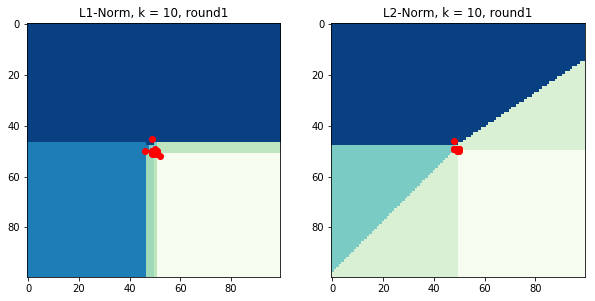

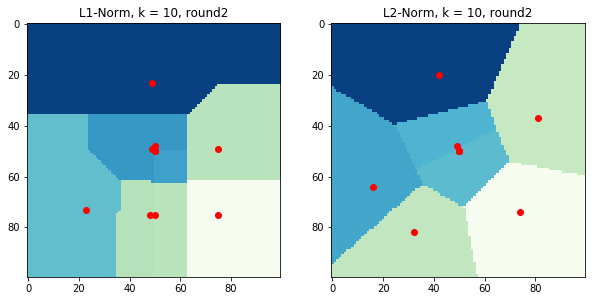

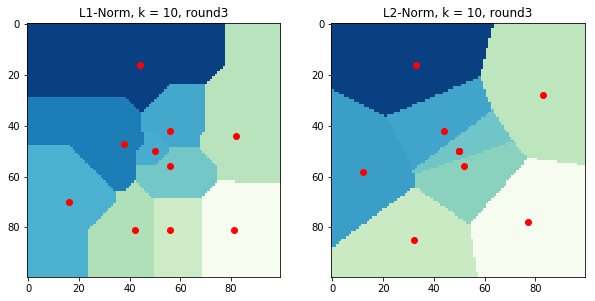

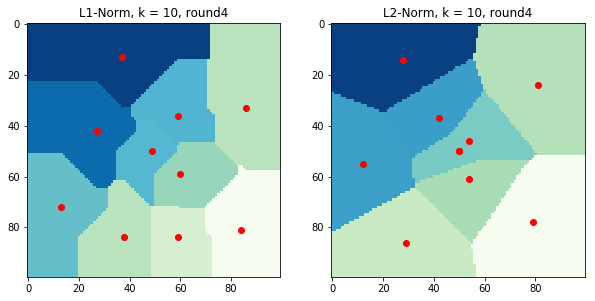

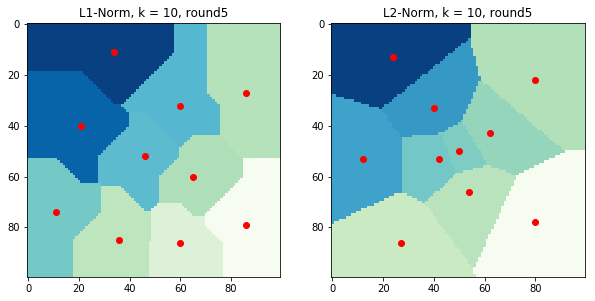

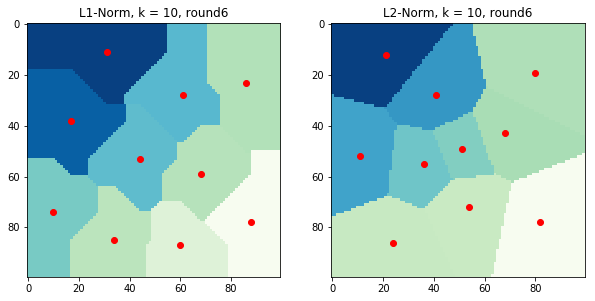

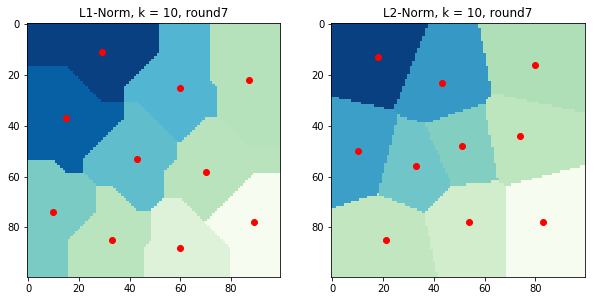

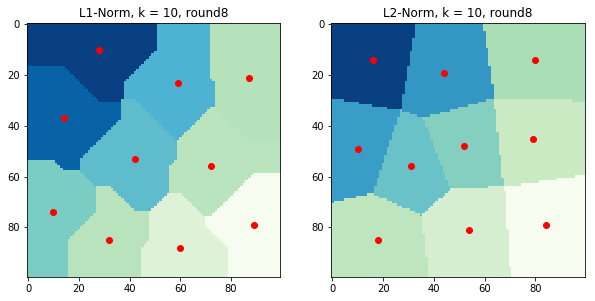

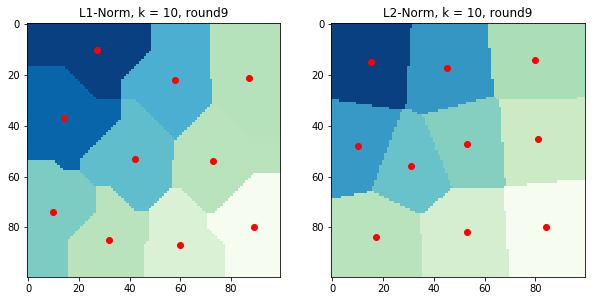

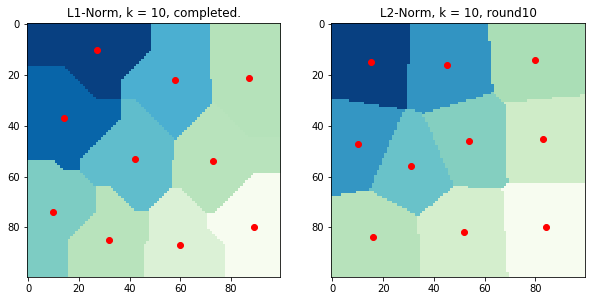

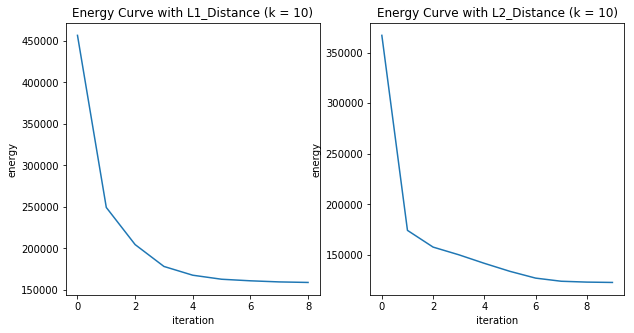

In [17]:
K_mean_clustering(100, 100, 10, 100, 0.005)